In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
data = pd.read_csv("heart-disease.csv")

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
data["target"].unique()

array([1, 0], dtype=int64)

In [16]:
data.corr()["target"].abs().sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

<Axes: ylabel='target'>

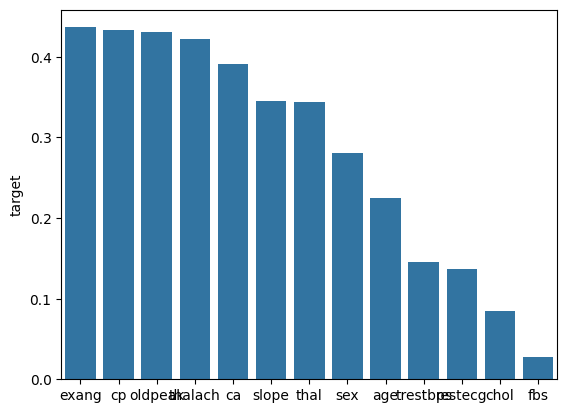

In [22]:
fig, ax = plt.subplots()
sns.barplot(data.corr()["target"].drop(["target"]).abs().sort_values(ascending=False))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import sklearn.linear_model

In [28]:
X = data.drop(columns=["target"])
y = data[["target"]]

In [29]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


<Axes: xlabel='target', ylabel='count'>

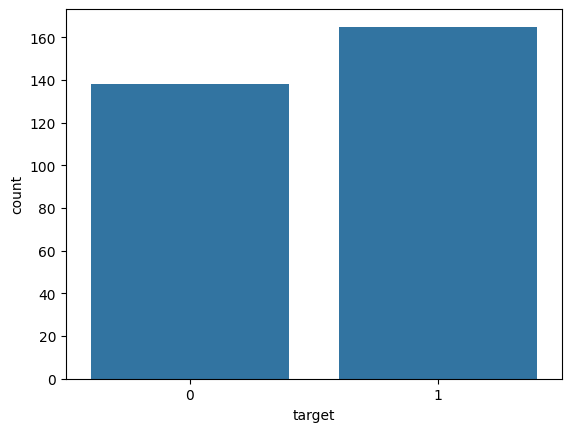

In [38]:
fig, ax = plt.subplots()
sns.barplot(y["target"].value_counts())

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
tree_cl = DecisionTreeClassifier(max_depth = 8)

In [43]:
tree_cl.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [44]:
y_pred = tree_cl.predict(X_test)

In [45]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [59]:
frst_cl = RandomForestClassifier(500, max_depth=8, max_features="sqrt", criterion="entropy")

In [60]:
frst_cl.fit(X_train, y_train["target"])

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [61]:
y_pred = frst_cl.predict(X_test)

In [62]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

